<a href="https://colab.research.google.com/github/Orlane1/epitechAI/blob/master/01_Tensor_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/data/Tensor_Management.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Kata: Tensor Management

## Instructions

This is a self-correcting exercise generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Complete the cells beginning with `# YOUR CODE HERE` and run the subsequent cells to check your code.

## Part 1: Tensor Basics

In [0]:
# Import NumPy
import numpy as np

### Question

Create a 2D tensor (a matrix) with dimensions (3,4) containing integer values of your choice. Store this tensor in a variable named `x`.

In [0]:
x = np.random.randint(1, 10, (3, 4))

In [0]:
print(x)
# Assert dimensions
assert x.ndim == 2
assert x.shape == (3, 4)
# Assert data type 
assert issubclass(x.dtype.type, np.integer)

[[9 8 5 7]
 [1 1 6 9]
 [2 6 3 1]]


### Question

Update the shape of the previous tensor so that it has dimensions (6,2).

In [0]:
x = x.reshape(6, 2)

In [0]:
print(x)
# Assert tensor dimensions
assert x.ndim == 2
assert x.shape == (6, 2)

[[9 8]
 [5 7]
 [1 1]
 [6 9]
 [2 6]
 [3 1]]


### Question

Change the type of the previous tensor values to `float32`.

In [0]:
x = x.astype(float)

In [0]:
print(x)
# Assert data type
assert issubclass(x.dtype.type, np.floating)

[[9. 8.]
 [5. 7.]
 [1. 1.]
 [6. 9.]
 [2. 6.]
 [3. 1.]]


### Question

Normalize the previous tensor so that it has a mean of 0 and a standard deviation of 1 on its first axis.

In [0]:
xmax, xmin = x.max(), x.min()
x = (x - xmin)/(xmax - xmin)

In [0]:
print(x)
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
# Assert mean
assert np.abs(np.max(x_mean)) < 10**-6
# Assert standard deviation
assert np.abs(np.max(x_std-1)) < 10**-6

[[1.    0.875]
 [0.5   0.75 ]
 [0.    0.   ]
 [0.625 1.   ]
 [0.125 0.625]
 [0.25  0.   ]]


AssertionError: ignored

## Part 2: One-hot Encoding

In [0]:
from keras.utils import to_categorical

# Definition of a 1D tensor (vector)
tensor = np.array([3, 1, 0, 2, 1])

Using TensorFlow backend.


### Question

Encode the previous tensor into the `x` variable, following a binary representation (`one-hot encoding`).

In [0]:
x = to_categorical(tensor)

In [0]:
print(x)
# Assert one-hot encoding
assert x.shape == (5, 4)
assert np.array_equal([0,0,0,1], x[0])
assert np.array_equal([0,1,0,0], x[1])
assert np.array_equal([1,0,0,0], x[2])
assert np.array_equal([0,0,1,0], x[3])
assert np.array_equal([0,1,0,0], x[4])

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


## Part 3: Image Management

In [0]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images
# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Number of images: 2. Images tensor: (2, 427, 640, 3)
First image: (427, 640, 3)


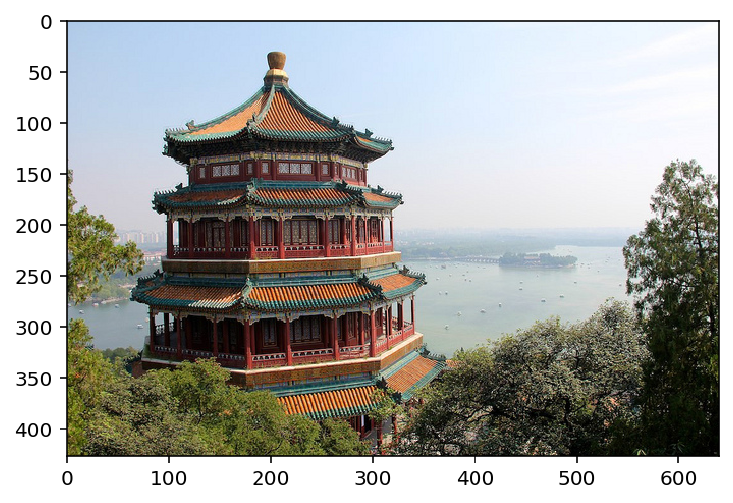

In [0]:
# Load samples images
images = np.asarray(load_sample_images().images)
print(f'Number of images: {len(images)}. Images tensor: {images.shape}')

first_image = images[0]
# Display first image
plt.imshow(first_image)

# Print details about first image
print(f'First image: {first_image.shape}')

### Question

Store in variables respectively named `rgb_values_topleft` and `rgb_values_bottomright` the RGB values of the top-left and bottom-right pixels of the first image.

In [0]:
rgb_values_topleft = first_image[0,0]
rgb_values_bottomright = first_image[first_image.shape[0] - 1,first_image.shape[1] - 1]

In [0]:
print(f'Top-left pixel: {rgb_values_topleft}')
assert rgb_values_topleft.shape == (3,)
print(f'Bottom-right pixel: {rgb_values_bottomright}')
assert rgb_values_bottomright.shape == (3,)

Top-left pixel: [174 201 231]
Bottom-right pixel: [15 24  7]


### Question

Reshape the previous `images` tensor into a 2D tensor.

In [0]:
images = images.reshape(images.shape[0], -1)

In [0]:
# Assert new tensor dimensions
assert images.shape == (2, 819840)
# Assert RGB values of top-left in first image
assert np.array_equal(rgb_values_topleft, images[0,:3])
# Assert RGB values of bottom-right pixel in first image
assert np.array_equal(rgb_values_bottomright, images[0,819837:])